In [1]:
import pandas as pd
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
import itertools as it

pd.options.display.max_rows = 20
plt.rcParams.update({"font.size":20})

# Import data

In [2]:
btr = pd.read_csv("SD_analysis_bbm-bnet-inputs-true.csv")

btr.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
btr.sort_values(by=["model_name"], inplace=True)
btr.reset_index(drop=True, inplace=True)
btr.attrs["name"] = "bbm-true"

btr

,model_name,n,sdsize,sddepth,att,maa,mintrap
0,001.bnet,321.0,1.0,0.0,1.0,0.0,1.0
1,002.bnet,139.0,10656.0,14.0,24.0,0.0,24.0
2,003.bnet,20.0,1.0,0.0,1.0,0.0,1.0
3,004.bnet,247.0,NaN,NaN,352.0,0.0,352.0
4,005.bnet,28.0,7.0,4.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
207,208.bnet,15.0,14.0,4.0,5.0,0.0,5.0
208,209.bnet,87.0,2.0,1.0,1.0,0.0,1.0
209,210.bnet,144.0,2.0,1.0,1.0,0.0,1.0
210,211.bnet,183.0,3.0,2.0,1.0,0.0,1.0


In [3]:
brn = pd.read_csv("SD_analysis_bbm-bnet-inputs-random.csv")

brn.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
brn.sort_values(by=["model_name"], inplace=True)
brn.reset_index(drop=True, inplace=True)
brn.attrs["name"] = "bbm-random"

brn

,model_name,n,sdsize,sddepth,att,maa,mintrap
0,001_0000000000011111000.bnet,321.0,1.0,0.0,1.0,0.0,1.0
1,001_0000001000011000011.bnet,321.0,1.0,0.0,1.0,0.0,1.0
2,001_0000001000110110001.bnet,321.0,1.0,0.0,1.0,0.0,1.0
3,001_0000010000000111100.bnet,321.0,1.0,0.0,1.0,0.0,1.0
4,001_0000010011101011100.bnet,321.0,1.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
12035,212_011.bnet,16.0,1.0,0.0,1.0,0.0,1.0
12036,212_100.bnet,16.0,2.0,1.0,1.0,0.0,1.0
12037,212_101.bnet,16.0,2.0,1.0,1.0,0.0,1.0
12038,212_110.bnet,16.0,2.0,1.0,1.0,0.0,1.0


In [4]:
models = []
for lst in brn["model_name"].str.split("_"):
    new_lst = lst[0].split(".")
    models.append(new_lst[0])

brn_avg = pd.DataFrame(models)
brn_avg.columns = ["model_name"]
brn_avg = pd.concat([brn_avg,brn.loc[:,"n":]], axis=1)

brn_avg = brn_avg.groupby(["model_name"]).mean()

brn_avg.reset_index(inplace=True)
brn_avg.attrs["name"] = "bbm-rand-avg"

brn_avg

,model_name,n,sdsize,sddepth,att,maa,mintrap
0,001,321.0,1.031250,0.015625,1.015625,0.0,1.015625
1,002,139.0,2149.111111,13.444444,NaN,NaN,6.666667
2,003,20.0,2.000000,0.500000,1.500000,0.0,1.500000
3,004,NaN,NaN,NaN,NaN,NaN,NaN
4,005,28.0,7.000000,4.000000,1.000000,0.0,1.000000
...,...,...,...,...,...,...,...
207,208,15.0,14.000000,4.000000,5.000000,0.0,5.000000
208,209,87.0,14.750000,2.750000,2.333333,0.0,2.000000
209,210,144.0,2.000000,1.000000,1.000000,0.0,1.000000
210,211,183.0,3.000000,2.000000,1.000000,0.0,1.000000


In [5]:
nk2 = pd.read_csv("SD_analysis_random_nk2.csv")

nk2.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
nk2.sort_values(by=["model_name"], inplace=True)
nk2.reset_index(drop=True, inplace=True)
nk2.attrs["name"] = "NK2"

nk2

,model_name,n,sdsize,sddepth,att,maa,mintrap
0,n10_0.bnet,10,2.0,1.0,1.0,0.0,1.0
1,n10_1.bnet,10,2.0,1.0,1.0,0.0,1.0
2,n10_10.bnet,10,2.0,1.0,1.0,0.0,1.0
3,n10_11.bnet,10,2.0,1.0,1.0,0.0,1.0
4,n10_12.bnet,10,2.0,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
995,n80_95.bnet,80,3.0,1.0,2.0,0.0,2.0
996,n80_96.bnet,80,2.0,1.0,1.0,0.0,1.0
997,n80_97.bnet,80,2.0,1.0,1.0,0.0,1.0
998,n80_98.bnet,80,2.0,1.0,1.0,0.0,1.0


In [6]:
nk3 = pd.read_csv("SD_analysis_random_nk3.csv")

nk3.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
nk3.sort_values(by=["model_name"], inplace=True)
nk3.reset_index(drop=True, inplace=True)
nk3.attrs["name"] = "NK3"

nk3

,model_name,n,sdsize,sddepth,att,maa,mintrap
0,n10_0,10,17,4,2.0,0.0,2
1,n10_1,10,12,3,5.0,0.0,5
2,n10_10,10,1,0,1.0,0.0,1
3,n10_11,10,13,5,3.0,0.0,3
4,n10_12,10,3,2,1.0,0.0,1
...,...,...,...,...,...,...,...
695,n80_95,80,4,2,2.0,0.0,2
696,n80_96,80,34,5,4.0,0.0,4
697,n80_97,80,5,2,2.0,0.0,2
698,n80_98,80,12,4,3.0,0.0,3


In [7]:
ncf2_5 = pd.read_csv("SD_analysis_random_ncf2_5.csv")

ncf2_5.columns = ["model_name", "n", "sdsize", "sddepth", "att", "maa", "mintrap"]
ncf2_5.sort_values(by=["model_name"], inplace=True)
ncf2_5.reset_index(drop=True, inplace=True)
ncf2_5.attrs["name"] = "NCF2.5"

ncf2_5

,model_name,n,sdsize,sddepth,att,maa,mintrap
0,n10_0.bnet,10,8,3,3,0,3
1,n10_1.bnet,10,1,0,1,0,1
2,n10_10.bnet,10,2,1,1,0,1
3,n10_11.bnet,10,3,2,1,0,1
4,n10_12.bnet,10,3,1,2,0,2
...,...,...,...,...,...,...,...
595,n80_95.bnet,80,1,0,1,0,1
596,n80_96.bnet,80,3,1,2,0,2
597,n80_97.bnet,80,15,3,4,0,4
598,n80_98.bnet,80,10,3,3,0,3


# Old scatter plots

In [8]:
class PlotVar:
    _label_dict = {
        "n": r"network size",
        "sdsize": r"SD size",
        "sddepth": r"SD depth",
        "att": r"number of attractors",
        "maa": r"number of motif avoidant attractors",
        "mintrap": r"number of minimal trapspaces",
    }

    def __init__(self, data:pd.DataFrame, name: str, minval: float, maxval: float, log:bool=False, trend:bool=False):
        self.data = data
        self.name = name
        self.minval = minval
        self.maxval = maxval
        self.label = self._label_dict[name]
        self.log = log

In [9]:
def scatter_plots(vars, type="scatter"):
    icount = len(vars)
    jcount = len(vars[0])

    fig = plt.figure(figsize=(10 * jcount, 10 * icount))
    fig.set_facecolor("white")

    figs = fig.subfigures(icount, jcount)
    figs = np.reshape(
        figs, (icount, jcount)
    )  # always treat as 2d array, even when only 1 col or row

    for i, j in it.product(range(icount), range(jcount)):
        px, py = vars[i][j]
        data = px.data.copy() 
        vx, vy = px.name, py.name
        xmin, xmax = px.minval, px.maxval  # lims[i][j][0]
        ymin, ymax = py.minval, py.maxval  # lims[i][j][1]
        xlog, ylog = px.log, py.log
    
        axd = figs[i, j].subplots(1,1)
        axd.set_zorder(10)
        axd.set_title(data.attrs["name"] + " " + py.label + " vs " + px.label)

        if xlog:
            axd.set_xscale("log")
        else:
            axd.xaxis.get_major_locator().set_params(integer=True)

        if ylog:
            axd.set_yscale("log")

        axd.scatter(data[vx], data[vy],
            s=100,
            alpha=0.1,
            zorder=10,
            clip_on=False,
        )
        axd.set_xlabel(px.label)
        axd.set_ylabel(py.label)
        axd.set_xlim(xmin, xmax)
        axd.set_ylim(ymin, ymax)

        figs[i, j].subplots_adjust(hspace=0.0135, wspace=0.0135)
    fig.subplots_adjust(bottom=0.08, left=0.05)
    return fig

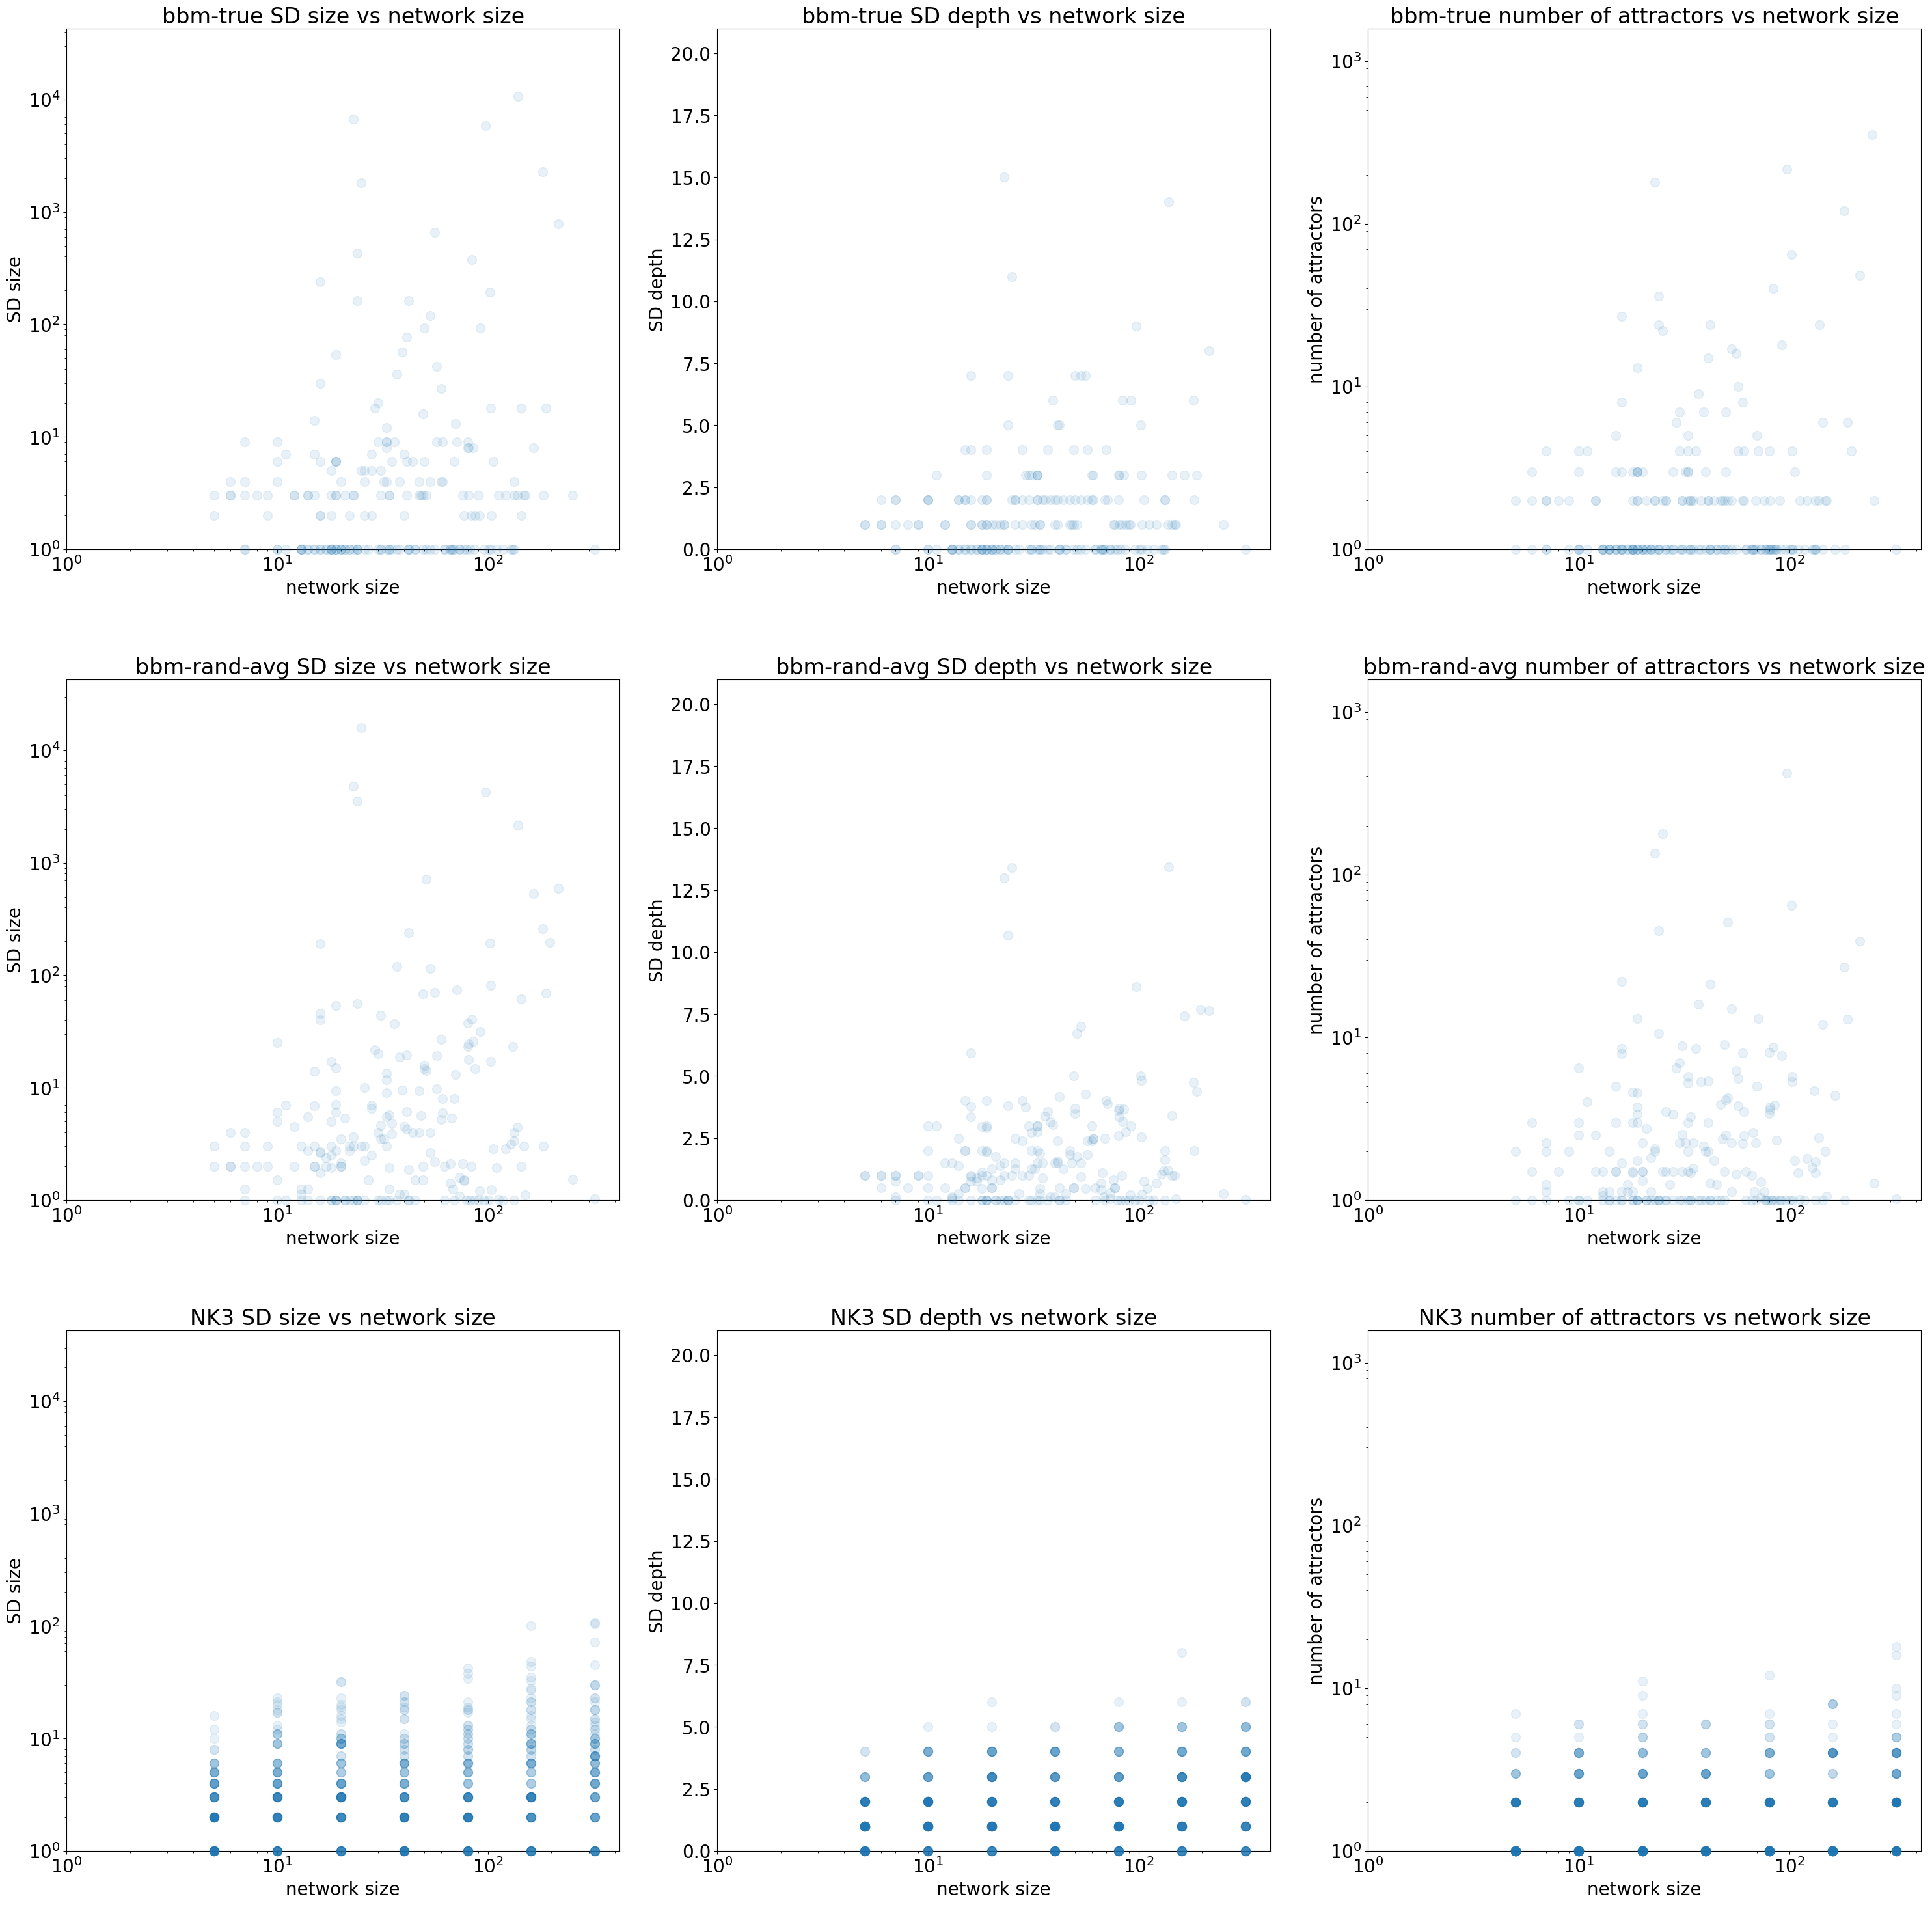

In [10]:
vars = [
    [
        (
            PlotVar(btr,"n",1,brn["n"].max()+100,log=True),
            PlotVar(btr,"sdsize",1,brn["sdsize"].max()*1.2,log=True),
        ),
        (
            PlotVar(btr,"n",1,brn["n"].max()+100,log=True),
            PlotVar(btr,"sddepth",0,brn["sddepth"].max()+1),
        ),
        (
            PlotVar(btr,"n",1,brn["n"].max()+100,log=True),
            PlotVar(btr,"att",1,brn["att"].max()*1.2,log=True),
        ),
    ],
    [
        (
            PlotVar(brn_avg,"n",1,brn["n"].max()+100,log=True),
            PlotVar(brn_avg,"sdsize",1,brn["sdsize"].max()*1.2,log=True),
        ),
        (
            PlotVar(brn_avg,"n",1,brn["n"].max()+100,log=True),
            PlotVar(brn_avg,"sddepth",0,brn["sddepth"].max()+1),
        ),
        (
            PlotVar(brn_avg,"n",1,brn["n"].max()+100,log=True),
            PlotVar(brn_avg,"att",1,brn["att"].max()*1.2,log=True),
        ),
    ],
    [
        (
            PlotVar(nk3,"n",1,brn["n"].max()+100,log=True),
            PlotVar(nk3,"sdsize",1,brn["sdsize"].max()*1.2,log=True),
        ),
        (
            PlotVar(nk3,"n",1,brn["n"].max()+100,log=True),
            PlotVar(nk3,"sddepth",0,brn["sddepth"].max()+1),
        ),
        (
            PlotVar(nk3,"n",1,brn["n"].max()+100,log=True),
            PlotVar(nk3,"att",1,brn["att"].max()*1.2,log=True),
        ),
    ],
]

fig = scatter_plots(vars)

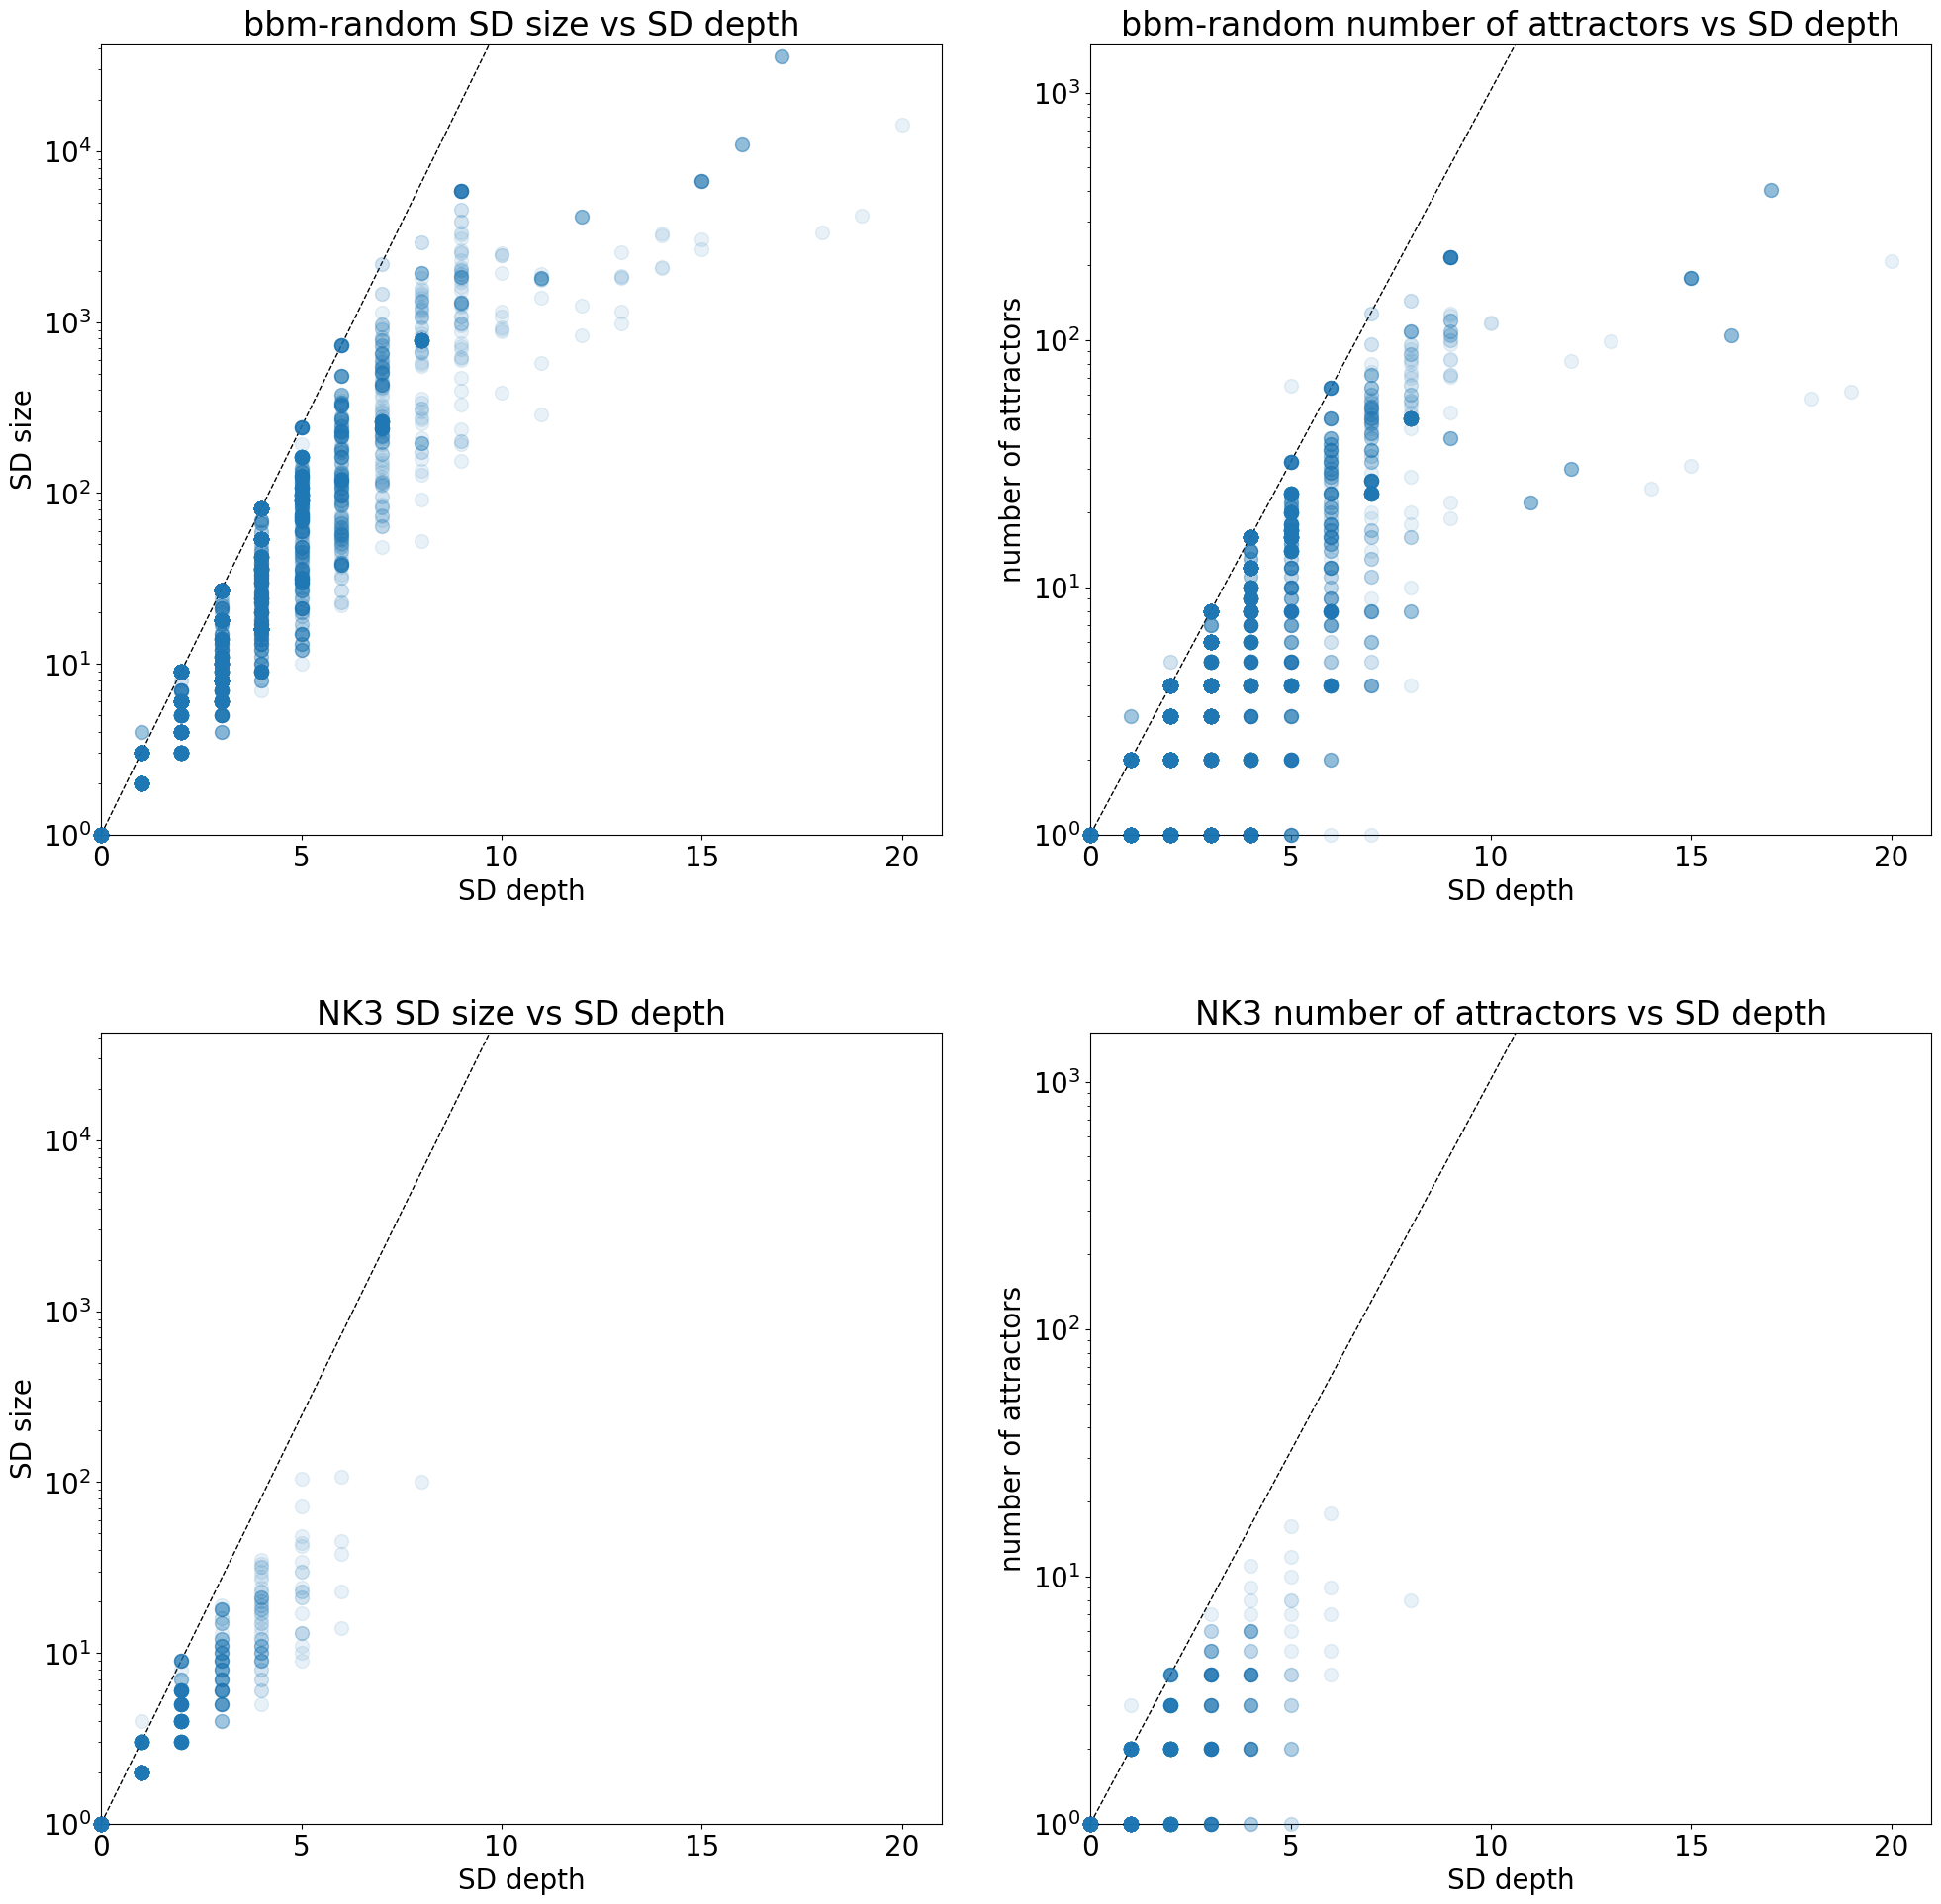

In [14]:
vars = [
    [
        (
            PlotVar(brn,"sddepth",0,brn["sddepth"].max()+1),
            PlotVar(brn,"sdsize",1,brn["sdsize"].max()*1.2,log=True),
        ),
        (
            PlotVar(brn,"sddepth",0,brn["sddepth"].max()+1),
            PlotVar(brn,"att",1,brn["att"].max()*1.2,log=True),
        ),
    ],
    [
        (
            PlotVar(nk3,"sddepth",0,brn["sddepth"].max()+1),
            PlotVar(nk3,"sdsize",1,brn["sdsize"].max()*1.2,log=True),
        ),
        (
            PlotVar(nk3,"sddepth",0,brn["sddepth"].max()+1),
            PlotVar(nk3,"att",1,brn["att"].max()*1.2,log=True),
        ),
    ],
]

fig = scatter_plots(vars)


axs = fig.get_axes()

def draw_exp(x, subfigure):
    l = list(range (0,int(axs[0].get_xlim()[1])))
    m_l = []
    for i in l:
        m = x**i
        m_l.append(m)
    subfigure.plot(l,m_l,'k--',linewidth=1)

for x in [0,2]:
    draw_exp(3, axs[x])
for x in [1,3]:
    draw_exp(2, axs[x])


# New violin plots and min-max plots

In [11]:
variable_labels = {
        "n": r"network size",
        "sdsize": r"SD size",
        "sddepth": r"SD depth",
        "att": r"number of attractors",
        "maa": r"number of motif avoidant attractors",
        "mintrap": r"number of minimal trapspaces",
        "sdsize_log": r"SD size",
        "att_log": r"number of attractors",
        "n_bin": r"network size (sample size)",
        "d_bin": r"SD depth (sample size)",

    }

def make_violin(df, vx, vy, axd, left=True, color="C0"):
    vi_lst = []
    for name, group in df.groupby(by=vx):
        # if len(group) == 0:
        #     continue
        vi_lst.append(group[vy])
    vi = axd.violinplot(vi_lst, showextrema=False)
    for b in vi["bodies"]:
        # get the center
        m = np.mean(b.get_paths()[0].vertices[:, 0])
        # modify the paths to not go further right than the center
        if left:
            b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], -np.inf, m)
        else:
            b.get_paths()[0].vertices[:, 0] = np.clip(b.get_paths()[0].vertices[:, 0], m, np.inf)
        b.set_edgecolor(color)
        b.set_alpha(0.9)
    
    return vi

def make_box(df, vx, vy, axd):
    box_lst = []
    for name, group in df.groupby(by=vx):
        # if len(group) == 0:
        #     continue
        box_lst.append(group[vy])
    box = axd.boxplot(box_lst)

    return box

def box_or_violin(dfs, vxs, vys, violin=True):
    icount = len(vxs)
    jcount = len(vys)

    fig = plt.figure(figsize=(10 * jcount, 10 * icount))
    fig.set_facecolor("white")

    figs = fig.subfigures(icount, jcount)
    figs = np.reshape(figs, (icount, jcount))  # always treat as 2d array, even when only 1 col or row

    for i, j in it.product(range(icount), range(jcount)):
        vx = vxs[i]
        vy = vys[j]

        axd = figs[i, j].subplots(1,1)
        color1 = "C0"
        color2 = "C1"
    
        df1 = dfs[0].dropna(subset=[vx, vy])
    
        if violin:
            df2 = dfs[1].dropna(subset=[vx, vy])
            v1 = make_violin(df1, vx, vy, axd, left=True, color=color1)
            v2 = make_violin(df2, vx, vy, axd, left=False, color=color2)
            axd.legend([v1['bodies'][0],v2['bodies'][0]],[dfs[0].attrs["name"], dfs[1].attrs["name"]])
            axd.set_title(dfs[0].attrs["name"] + " vs " + dfs[1].attrs["name"])

        else:
            v1 = make_box(df1, vx, vy, axd)
            axd.set_title(dfs[0].attrs["name"])

        axd.set_xlabel(variable_labels[vx])
        axd.set_ylabel(variable_labels[vy])

        xticklabels = sorted(list(df1[vx].unique()))
        axd.set_xticks([x+1 for x in range(len(xticklabels))], labels=xticklabels)
        axd.yaxis.get_major_locator().set_params(integer=True)
        if vy.endswith("log"):
            yticklabels=["$10^{"+str(int(x))+"}$" for x in axd.get_yticks()]
            axd.set_yticklabels(labels=yticklabels)

        axd.grid(visible=True, which="both", axis="y", linestyle="-", linewidth=1)

        figs[i, j].subplots_adjust(hspace=0.0135, wspace=0.0135)

    fig.subplots_adjust(bottom=0.08, left=0.05)

    return fig

In [12]:
bins = [5, 10, 20, 40, 80, 160, 320, 640]
labels = [5, 10, 20, 40, 80, 160, 320]

btr["n_bin"] = pd.cut(btr["n"], bins, right=False, labels=labels)
btr["sdsize_log"] = np.log10(btr["sdsize"])
btr["att_log"] = np.log10(btr["att"])

brn["n_bin"] = pd.cut(brn["n"], bins, right=False, labels=labels)
brn["sdsize_log"] = np.log10(brn["sdsize"])
brn["att_log"] = np.log10(brn["att"])

brn_avg["n_bin"] = pd.cut(brn_avg["n"], bins, right=False, labels=labels)
brn_avg["sdsize_log"] = np.log10(brn_avg["sdsize"])
brn_avg["att_log"] = np.log10(brn_avg["att"])

nk2["n_bin"] = pd.cut(nk2["n"], bins, right=False, labels=labels)
nk2["sdsize_log"] = np.log10(nk2["sdsize"])
nk2["att_log"] = np.log10(nk2["att"])

nk3["n_bin"] = pd.cut(nk3["n"], bins, right=False, labels=labels)
nk3["sdsize_log"] = np.log10(nk3["sdsize"])
nk3["att_log"] = np.log10(nk3["att"])

C:\Users\danie\AppData\Local\Temp\ipykernel_12100\3955131539.py:84: UserWarning: FixedFormatter should only be used together with FixedLocator
  axd.set_yticklabels(labels=yticklabels)


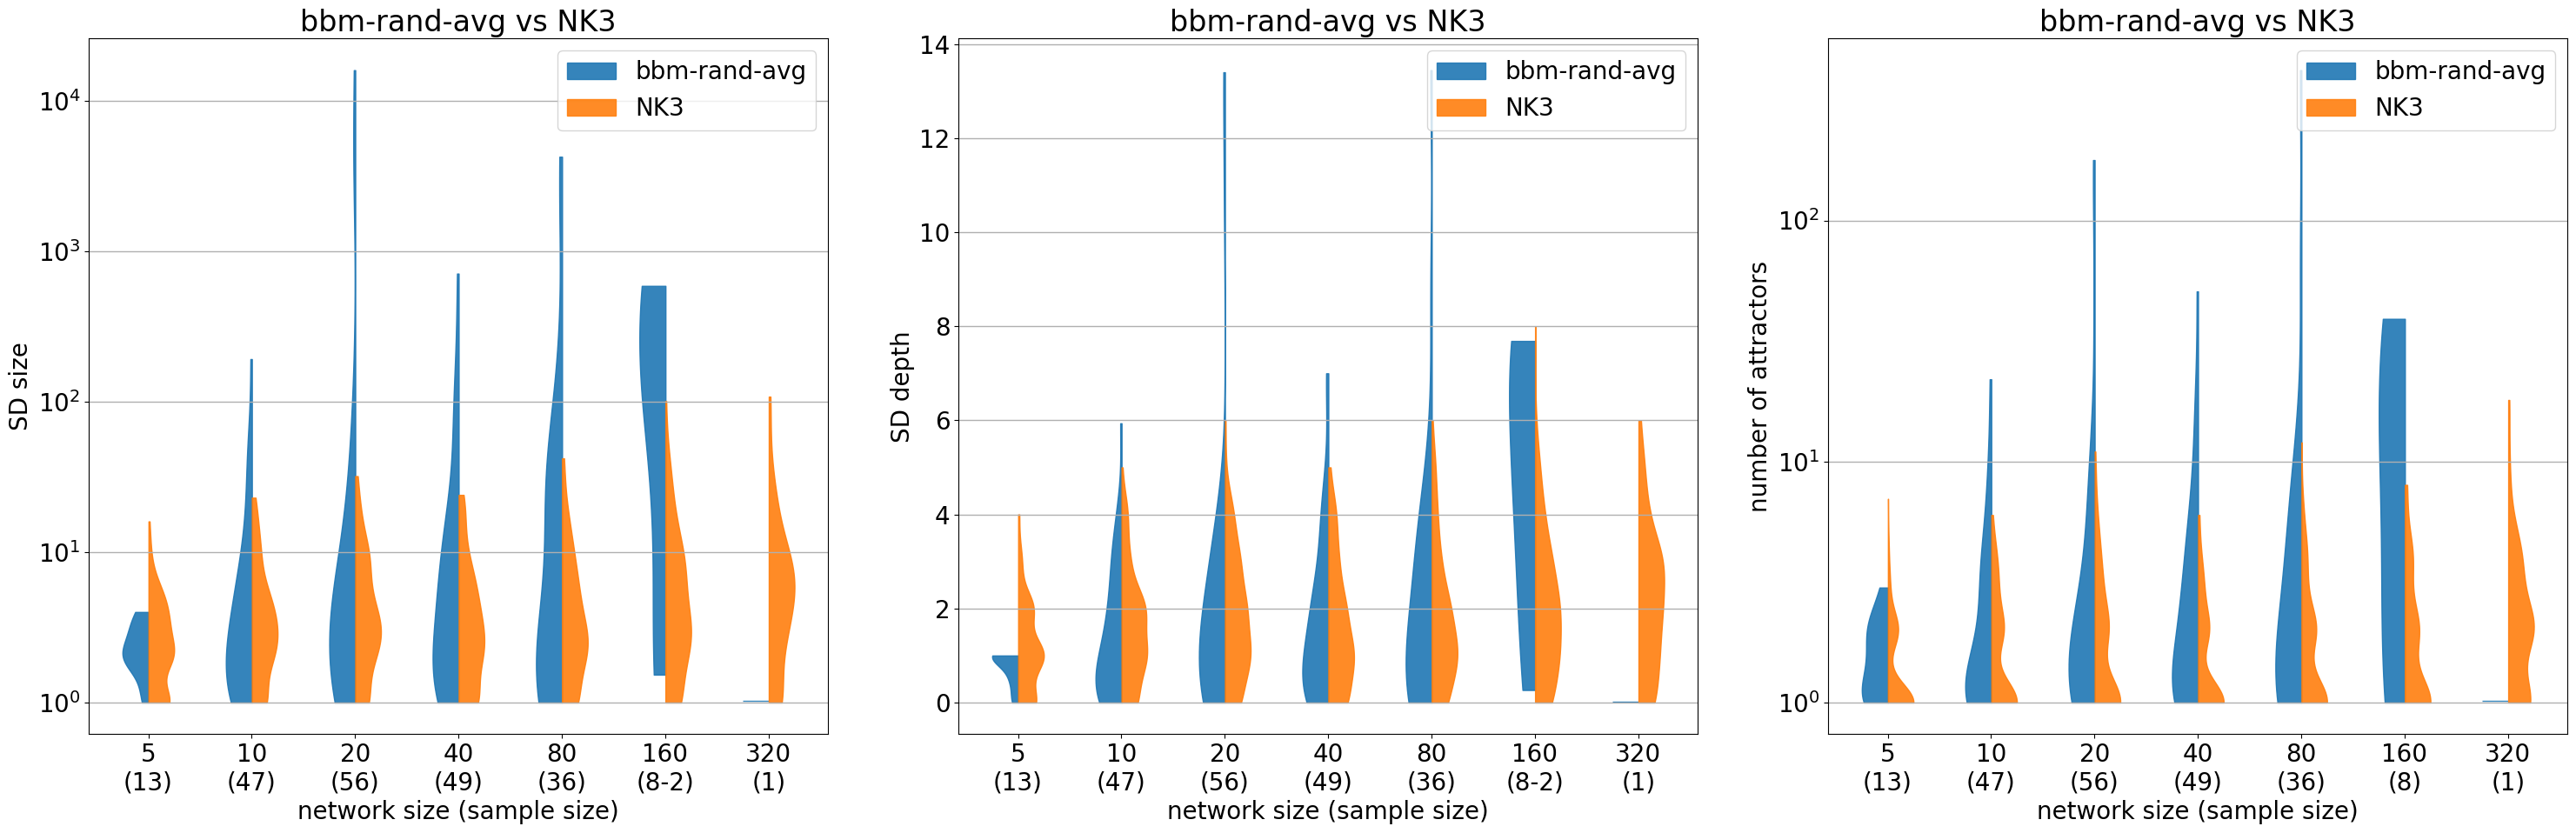

In [13]:
fig = box_or_violin(dfs = [brn_avg, nk3],
                    vxs = ["n_bin"],
                    vys = ["sdsize_log", "sddepth", "att_log"])

axs = fig.get_axes()
xticklabels = ["5\n(13)", "10\n(47)", "20\n(56)", "40\n(49)", "80\n(36)", "160\n(8-2)", "320\n(1)"]
axs[0].set_xticks([x+1 for x in range(len(xticklabels))], labels=xticklabels)
axs[1].set_xticks([x+1 for x in range(len(xticklabels))], labels=xticklabels)
xticklabels = ["5\n(13)", "10\n(47)", "20\n(56)", "40\n(49)", "80\n(36)", "160\n(8)", "320\n(1)"]
axs[2].set_xticks([x+1 for x in range(len(xticklabels))], labels=xticklabels)

In [15]:
def make_scatter(df, vx, vy, axd, color="C0"):
    x_lst = []
    max_lst = []
    mean_lst = []
    mid_lst = []
    min_lst = []

    for name, group in df.groupby(by=vx):
        # if len(group) == 0:
        #     continue
        x_lst.append(name.right)
        max_lst.append(group[vy].max())
        mean_lst.append(group[vy].mean())
        mid_lst.append(group[vy].median())
        min_lst.append(group[vy].min())

    axd.scatter(x_lst, max_lst, color=color, marker="v", s=100)
    axd.scatter(x_lst, mean_lst, color=color, marker="_", s=100)
    axd.scatter(x_lst, mid_lst, color=color, marker="x", s=100)
    axd.scatter(x_lst, min_lst, color=color, marker="^", s=100)

def max_mean_min(dfs, vxs, vys):
    icount = len(vxs)
    jcount = len(vys)

    fig = plt.figure(figsize=(10 * jcount, 10 * icount))
    fig.set_facecolor("white")

    figs = fig.subfigures(icount, jcount)
    figs = np.reshape(figs, (icount, jcount))  # always treat as 2d array, even when only 1 col or row

    for i, j in it.product(range(icount), range(jcount)):
        vx = vxs[i]
        vy = vys[j]

        axd = figs[i, j].subplots(1,1)
        color1 = "C0"
        color2 = "C1"
    
        df1 = dfs[0].dropna(subset=[vx, vy])
        make_scatter(df1, vx, vy, axd, color=color1)

        try:
            df2 = dfs[1].dropna(subset=[vx, vy])
            make_scatter(df2, vx, vy, axd, color=color2)
            axd.set_title(dfs[0].attrs["name"] + " vs " + dfs[1].attrs["name"])
        except:
            axd.set_title(dfs[0].attrs["name"])
            axd.legend(["max", "mean", "median", "min"])



        axd.xaxis.get_major_locator().set_params(integer=True)
        axd.set_yscale("log")
        
        axd.set_xlim(-0.5, 9.5)
        axd.set_xlabel(variable_labels[vx])
        axd.set_ylabel(variable_labels[vy])

        axd.grid()

        figs[i, j].subplots_adjust(hspace=0.0135, wspace=0.0135)

    fig.subplots_adjust(bottom=0.08, left=0.05)

    return fig

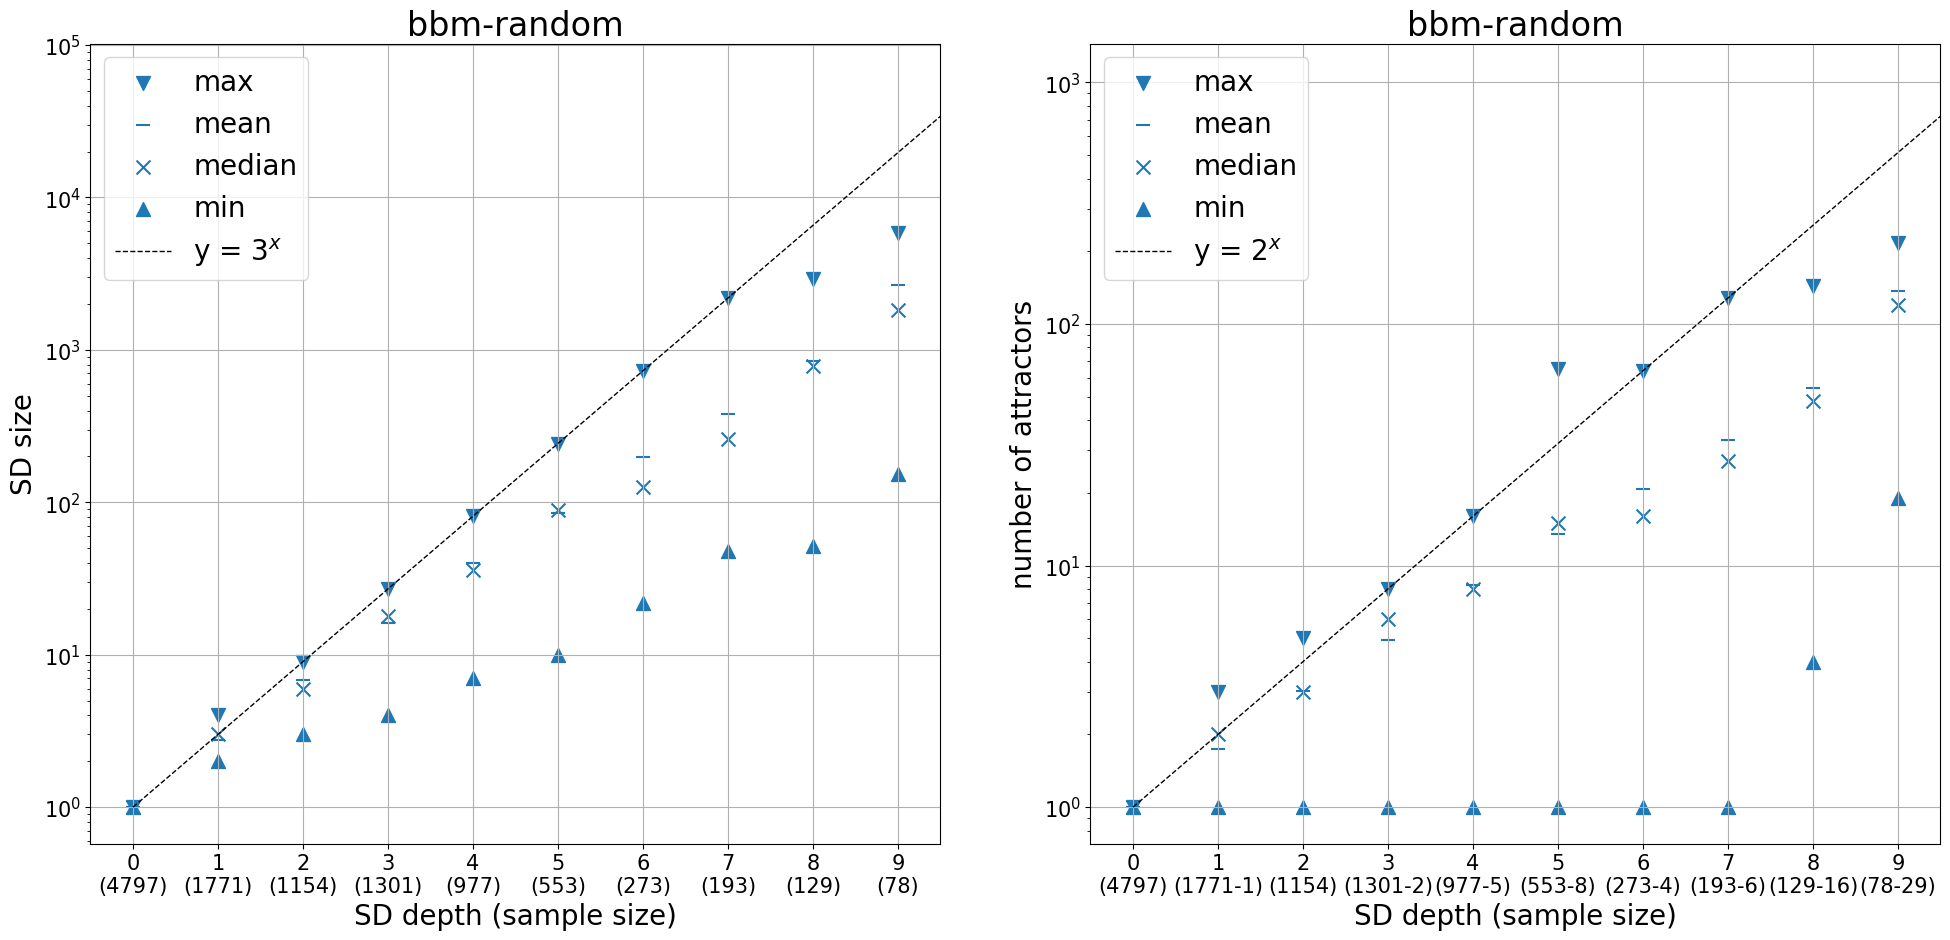

In [16]:
bins = range(-1, int(brn["sddepth"].max()))

brn["d_bin"] = pd.cut(brn["sddepth"], bins, right=True)
brn_avg["d_bin"] = pd.cut(brn_avg["sddepth"], bins, right=True)
nk3["d_bin"] = pd.cut(nk3["sddepth"], bins, right=True)

fig = max_mean_min(dfs = [brn],
                   vxs = ["d_bin"],
                   vys = ["sdsize", "att"])

axs = fig.get_axes()

def draw_exp(x, subfigure):
    l = list(range (0,int(axs[0].get_xlim()[1]+2)))
    m_l = []
    for i in l:
        m = x**i
        m_l.append(m)
    subfigure.plot(l,m_l,'k--',linewidth=1)

draw_exp(3, axs[0])
xticklabels = ["0\n(4797)",
               "1\n(1771)",
               "2\n(1154)",
               "3\n(1301)",
               "4\n(977)",
               "5\n(553)",
               "6\n(273)",
               "7\n(193)",
               "8\n(129)",
               "9\n(78)",
               ]
axs[0].set_xticks([x for x in range(len(xticklabels))], labels=xticklabels)
axs[0].tick_params(labelsize=15)
axs[0].legend(["max", "mean", "median", "min", "y = $3^x$"])

draw_exp(2, axs[1])
xticklabels = ["0\n(4797)",
               "1\n(1771-1)",
               "2\n(1154)",
               "3\n(1301-2)",
               "4\n(977-5)",
               "5\n(553-8)",
               "6\n(273-4)",
               "7\n(193-6)",
               "8\n(129-16)",
               "9\n(78-29)",
               ]
axs[1].set_xticks([x for x in range(len(xticklabels))], labels=xticklabels)
axs[1].tick_params(labelsize=15)
axs[1].legend(["max", "mean", "median", "min", "y = $2^x$"])
